In [22]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization settings
sns.set_style('whitegrid')
plt.rcParams['font.size'] = 12
pd.set_option('display.max_columns', None)

## Load Database

In [23]:
# Connect to database and load full dataset
conn = sqlite3.connect('../databases/nhanes_1st.db')
df = pd.read_sql_query('SELECT * FROM raw_dataset', conn)
conn.close()
print(f"Dataset shape: {df.shape}")

Dataset shape: (56893, 29)


## Univariate Analysis

**Purpose:** Analyze each variable individually to understand distributions, patterns, and characteristics.

**Steps:**
1. Identify variable types (categorical vs numerical)
2. Analyze target variables
3. Analyze continuous features
4. Analyze categorical features

In [24]:
# Identify variable types: Categorical vs Numerical
print("="*80)
print("VARIABLE TYPE IDENTIFICATION")
print("="*80)

# Get all column names
all_columns = df.columns.tolist()

# Exclude target variables from feature analysis (we'll analyze them separately)
target_columns = [
    'has_cardiovascular_disease',
    'high_waist_circumference', 'high_triglycerides_mg_dl', 'low_hdl_mg_dl', 
    'high_blood_pressure', 'high_glucose_mg_dl',
    'kidney_acr_mg_g', 'liver_alt_U_L'
]

feature_columns = [col for col in all_columns if col not in target_columns]

# Identify numerical (continuous) variables
# These are variables that are numeric and have many unique values
numerical_cols = []
categorical_cols = []

for col in feature_columns:
    # Check data type
    if df[col].dtype in ['int64', 'float64']:
        # Check number of unique values
        n_unique = df[col].nunique()
        # If few unique values (< 10), likely categorical
        # If many unique values, likely numerical
        if n_unique <= 10:
            categorical_cols.append(col)
        else:
            numerical_cols.append(col)
    else:
        categorical_cols.append(col)

print(f"\nTotal Features: {len(feature_columns)}")
print(f"  - Numerical (Continuous): {len(numerical_cols)}")
print(f"  - Categorical: {len(categorical_cols)}")
print(f"  - Target Variables: {len(target_columns)}")

print(f"\n📊 Numerical Variables ({len(numerical_cols)}):")
for col in sorted(numerical_cols):
    print(f"  • {col}")

print(f"\n📋 Categorical Variables ({len(categorical_cols)}):")
for col in sorted(categorical_cols):
    n_unique = df[col].nunique()
    print(f"  • {col} ({n_unique} unique values)")

print(f"\n🎯 Target Variables ({len(target_columns)}):")
for col in sorted(target_columns):
    print(f"  • {col}")


VARIABLE TYPE IDENTIFICATION

Total Features: 21
  - Numerical (Continuous): 18
  - Categorical: 3
  - Target Variables: 8

📊 Numerical Variables (18):
  • age
  • alcohol_drinks_per_week
  • bilirubin_mg_dl
  • body_mass_index
  • cholesterol_mg_dl
  • creatinine_mg_dl
  • heart_rate_bpm
  • height_cm
  • hemoglobin_g_dl
  • income_ratio
  • liver_ast_U_L
  • liver_ggt_U_L
  • mean_corpuscular_volume_fL
  • platelets_count
  • potassium_mmol_L
  • sodium_mmol_L
  • uric_acid_mg_dl
  • white_blood_cells_count

📋 Categorical Variables (3):
  • ethnicity (6 unique values)
  • gender (2 unique values)
  • smoking_status (3 unique values)

🎯 Target Variables (8):
  • has_cardiovascular_disease
  • high_blood_pressure
  • high_glucose_mg_dl
  • high_triglycerides_mg_dl
  • high_waist_circumference
  • kidney_acr_mg_g
  • liver_alt_U_L
  • low_hdl_mg_dl


1.1 TARGET: Cardiovascular Disease Distribution

Distribution:
  Healthy (0): 30,018 (52.76%)
  Has CVD (1): 4,079 (7.17%)
  Missing: 22,796


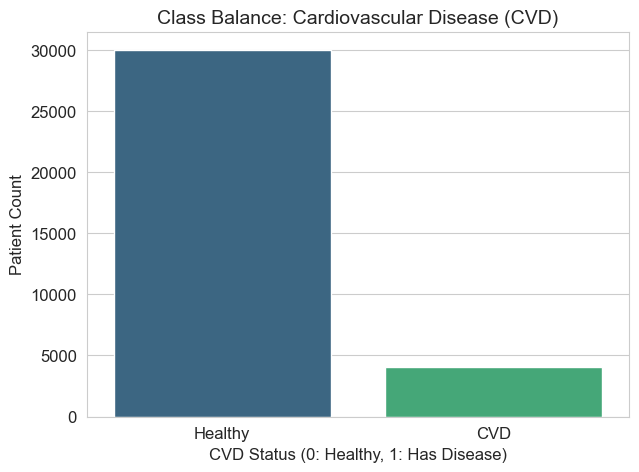


1.2 TARGET: Metabolic Syndrome Components (5 Labels)

high_waist_circumference:
  Normal (0): 26,397 (46.40%)
  Abnormal (1): 18,942 (33.29%)
  Missing: 11,554 (20.31%)


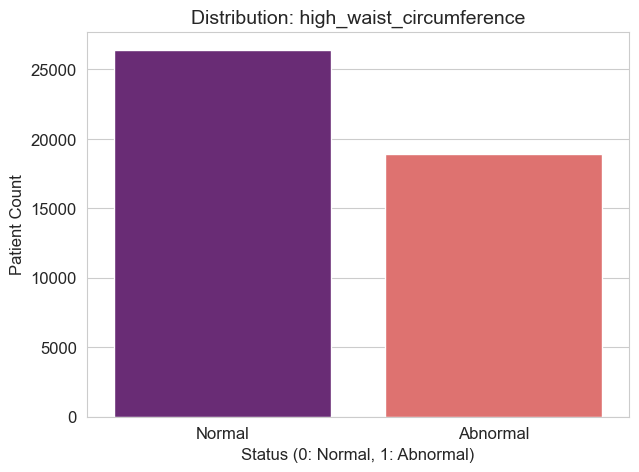


high_triglycerides_mg_dl:
  Normal (0): 13,725 (24.12%)
  Abnormal (1): 3,145 (5.53%)
  Missing: 40,023 (70.35%)


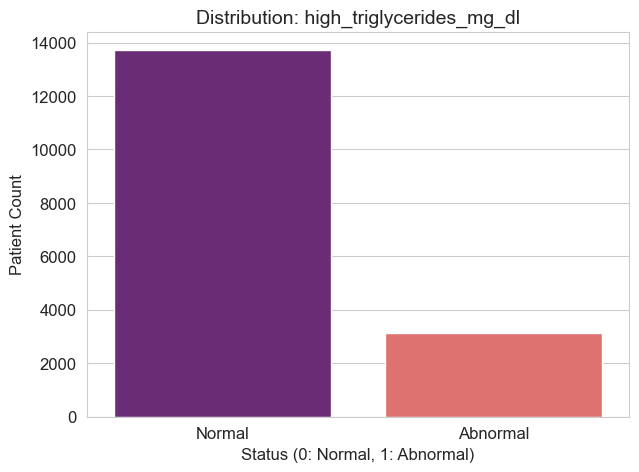


low_hdl_mg_dl:
  Normal (0): 28,186 (49.54%)
  Abnormal (1): 11,150 (19.60%)
  Missing: 17,557 (30.86%)


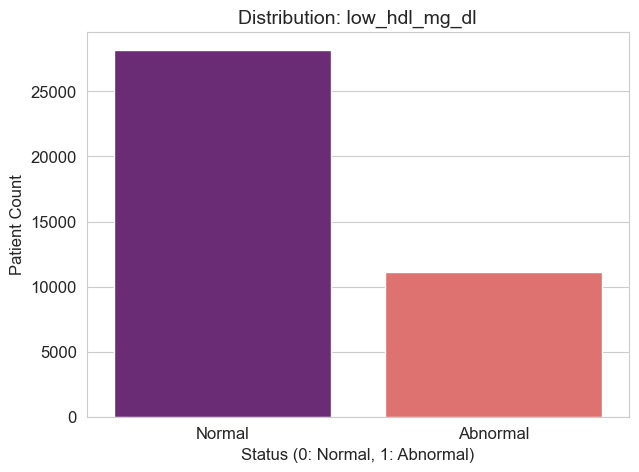


high_blood_pressure:
  Normal (0): 28,384 (49.89%)
  Abnormal (1): 10,520 (18.49%)
  Missing: 17,989 (31.62%)


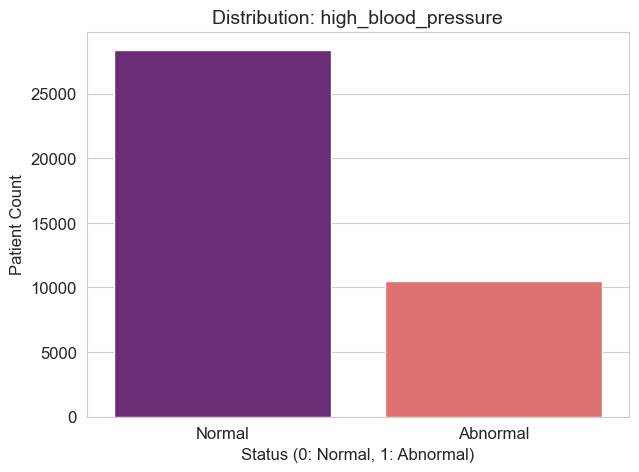


high_glucose_mg_dl:
  Normal (0): 7,491 (13.17%)
  Abnormal (1): 8,864 (15.58%)
  Missing: 40,538 (71.25%)


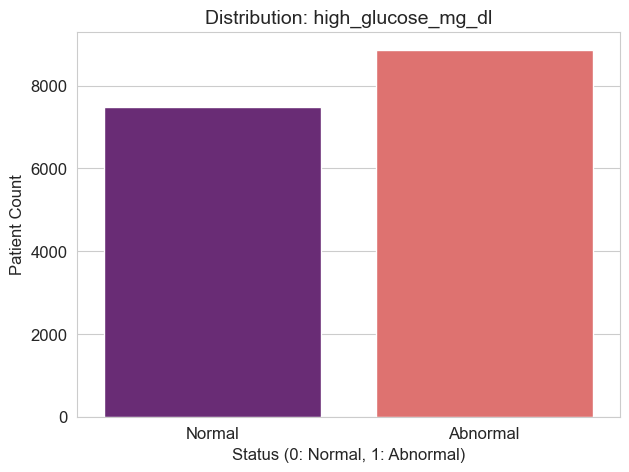


1.3 TARGET: Kidney Function (ACR Log)

Statistics:
  Mean: 2.4754
  Median: 2.2146
  Std: 1.0395
  Min: 0.0785
  Max: 9.9595
  Missing: 12,267 (21.56%)


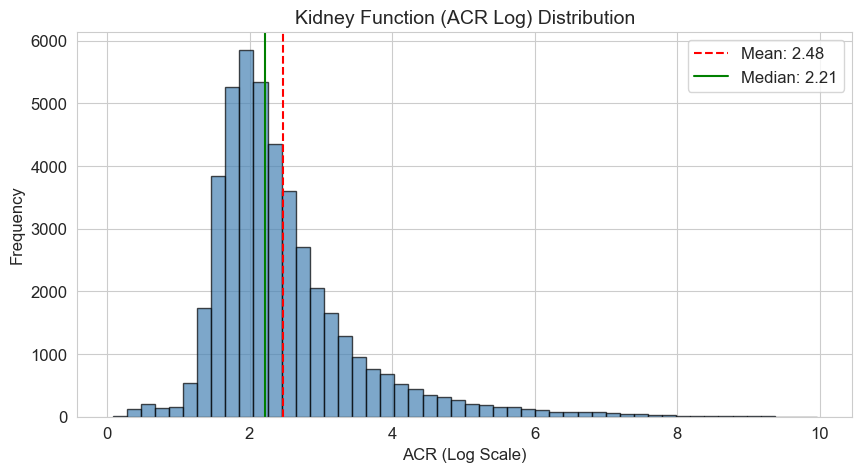


1.4 TARGET: Liver Function (ALT Log)

Statistics:
  Mean: 2.9470
  Median: 2.8904
  Std: 0.5226
  Min: 0.6931
  Max: 6.5250
  Missing: 22,390 (39.35%)


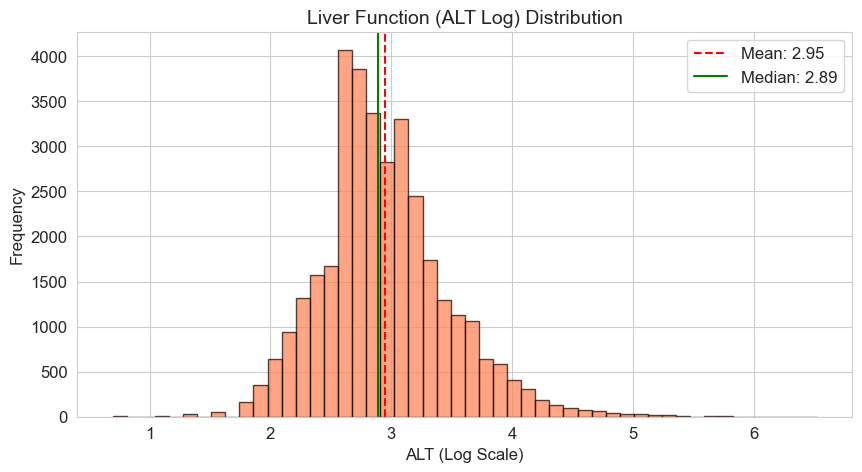

In [25]:
# =========================================================
# 1. TARGET VARIABLE ANALYSIS
# =========================================================

# 1.1 Cardiovascular Disease (Binary Classification)
print("="*80)
print("1.1 TARGET: Cardiovascular Disease Distribution")
print("="*80)
if 'has_cardiovascular_disease' in df.columns:
    target_counts = df['has_cardiovascular_disease'].value_counts(dropna=False)
    target_pct = df['has_cardiovascular_disease'].value_counts(normalize=True, dropna=False) * 100
    print(f"\nDistribution:")
    print(f"  Healthy (0): {target_counts.get(0, 0):,} ({target_pct.get(0, 0):.2f}%)")
    print(f"  Has CVD (1): {target_counts.get(1, 0):,} ({target_pct.get(1, 0):.2f}%)")
    print(f"  Missing: {df['has_cardiovascular_disease'].isnull().sum():,}")
    
    plt.figure(figsize=(7, 5))
    sns.countplot(
        x='has_cardiovascular_disease', 
        data=df, 
        palette='viridis', 
        hue='has_cardiovascular_disease', 
        legend=False
    )
    plt.title('Class Balance: Cardiovascular Disease (CVD)', fontsize=14)
    plt.xlabel('CVD Status (0: Healthy, 1: Has Disease)')
    plt.ylabel('Patient Count')
    plt.xticks([0, 1], ['Healthy', 'CVD'], rotation=0)
    plt.show()

# 1.2 Metabolic Syndrome Components (Multi-Label Classification)
print("\n" + "="*80)
print("1.2 TARGET: Metabolic Syndrome Components (5 Labels)")
print("="*80)
metabolic_labels = [
    'high_waist_circumference',
    'high_triglycerides_mg_dl',
    'low_hdl_mg_dl',
    'high_blood_pressure',
    'high_glucose_mg_dl'
]

for label in metabolic_labels:
    if label in df.columns:
        print(f"\n{label}:")
        counts = df[label].value_counts(dropna=False)
        pct = df[label].value_counts(normalize=True, dropna=False) * 100
        missing = df[label].isnull().sum()
        print(f"  Normal (0): {counts.get(0, 0):,} ({pct.get(0, 0):.2f}%)")
        print(f"  Abnormal (1): {counts.get(1, 0):,} ({pct.get(1, 0):.2f}%)")
        print(f"  Missing: {missing:,} ({missing/len(df)*100:.2f}%)")
        
        # Visualize distribution
        plt.figure(figsize=(7, 5))
        sns.countplot(
            x=label,
            data=df,
            palette='magma',
            hue=label,
            legend=False
        )
        plt.title(f'Distribution: {label}', fontsize=14)
        plt.xlabel('Status (0: Normal, 1: Abnormal)')
        plt.ylabel('Patient Count')
        plt.xticks([0, 1], ['Normal', 'Abnormal'], rotation=0)
        plt.show()

# 1.3 Kidney Function (Regression - ACR Log)
print("\n" + "="*80)
print("1.3 TARGET: Kidney Function (ACR Log)")
print("="*80)
if 'kidney_acr_mg_g' in df.columns:
    kidney_data = df['kidney_acr_mg_g'].dropna()
    print(f"\nStatistics:")
    print(f"  Mean: {kidney_data.mean():.4f}")
    print(f"  Median: {kidney_data.median():.4f}")
    print(f"  Std: {kidney_data.std():.4f}")
    print(f"  Min: {kidney_data.min():.4f}")
    print(f"  Max: {kidney_data.max():.4f}")
    print(f"  Missing: {df['kidney_acr_mg_g'].isnull().sum():,} ({df['kidney_acr_mg_g'].isnull().sum()/len(df)*100:.2f}%)")
    
    plt.figure(figsize=(10, 5))
    plt.hist(kidney_data, bins=50, color='steelblue', alpha=0.7, edgecolor='black')
    plt.axvline(kidney_data.mean(), color='red', linestyle='--', label=f'Mean: {kidney_data.mean():.2f}')
    plt.axvline(kidney_data.median(), color='green', linestyle='-', label=f'Median: {kidney_data.median():.2f}')
    plt.title('Kidney Function (ACR Log) Distribution', fontsize=14)
    plt.xlabel('ACR (Log Scale)')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

# 1.4 Liver Function (Regression - ALT Log)
print("\n" + "="*80)
print("1.4 TARGET: Liver Function (ALT Log)")
print("="*80)
if 'liver_alt_U_L' in df.columns:
    liver_data = df['liver_alt_U_L'].dropna()
    print(f"\nStatistics:")
    print(f"  Mean: {liver_data.mean():.4f}")
    print(f"  Median: {liver_data.median():.4f}")
    print(f"  Std: {liver_data.std():.4f}")
    print(f"  Min: {liver_data.min():.4f}")
    print(f"  Max: {liver_data.max():.4f}")
    print(f"  Missing: {df['liver_alt_U_L'].isnull().sum():,} ({df['liver_alt_U_L'].isnull().sum()/len(df)*100:.2f}%)")
    
    plt.figure(figsize=(10, 5))
    plt.hist(liver_data, bins=50, color='coral', alpha=0.7, edgecolor='black')
    plt.axvline(liver_data.mean(), color='red', linestyle='--', label=f'Mean: {liver_data.mean():.2f}')
    plt.axvline(liver_data.median(), color='green', linestyle='-', label=f'Median: {liver_data.median():.2f}')
    plt.title('Liver Function (ALT Log) Distribution', fontsize=14)
    plt.xlabel('ALT (Log Scale)')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

2. NUMERICAL FEATURES: Descriptive Statistics

Analyzing 18 numerical variables:


,count,mean,std,min,25%,50%,75%,max
age,56893.0,34.071485,25.270227,5.397605e-79,11.00,31.000000,57.000000,80.00
income_ratio,49583.0,2.407602,1.633919,5.397605e-79,1.02,1.980000,3.870000,5.00
body_mass_index,47424.0,26.443765,8.188407,1.110000e+01,20.40,25.600000,31.100000,92.30
height_cm,47508.0,156.699590,22.321240,7.830000e+01,151.30,162.100000,171.200000,202.70
heart_rate_bpm,37178.0,73.118605,12.344447,3.400000e+01,64.00,72.000000,80.666667,180.00
white_blood_cells_count,43938.0,7.290216,3.529356,1.400000e+00,5.70,7.000000,8.500000,400.00
platelets_count,43938.0,258.994287,70.151729,8.000000e+00,211.00,251.000000,298.000000,1021.00
hemoglobin_g_dl,43938.0,13.693971,1.500680,5.400000e+00,12.70,13.600000,14.700000,19.90
mean_corpuscular_volume_fL,43938.0,86.794736,6.480780,3.540000e+01,83.10,87.300000,91.000000,116.70
creatinine_mg_dl,34512.0,0.871477,0.449245,2.500000e-01,0.68,0.820000,0.980000,17.41


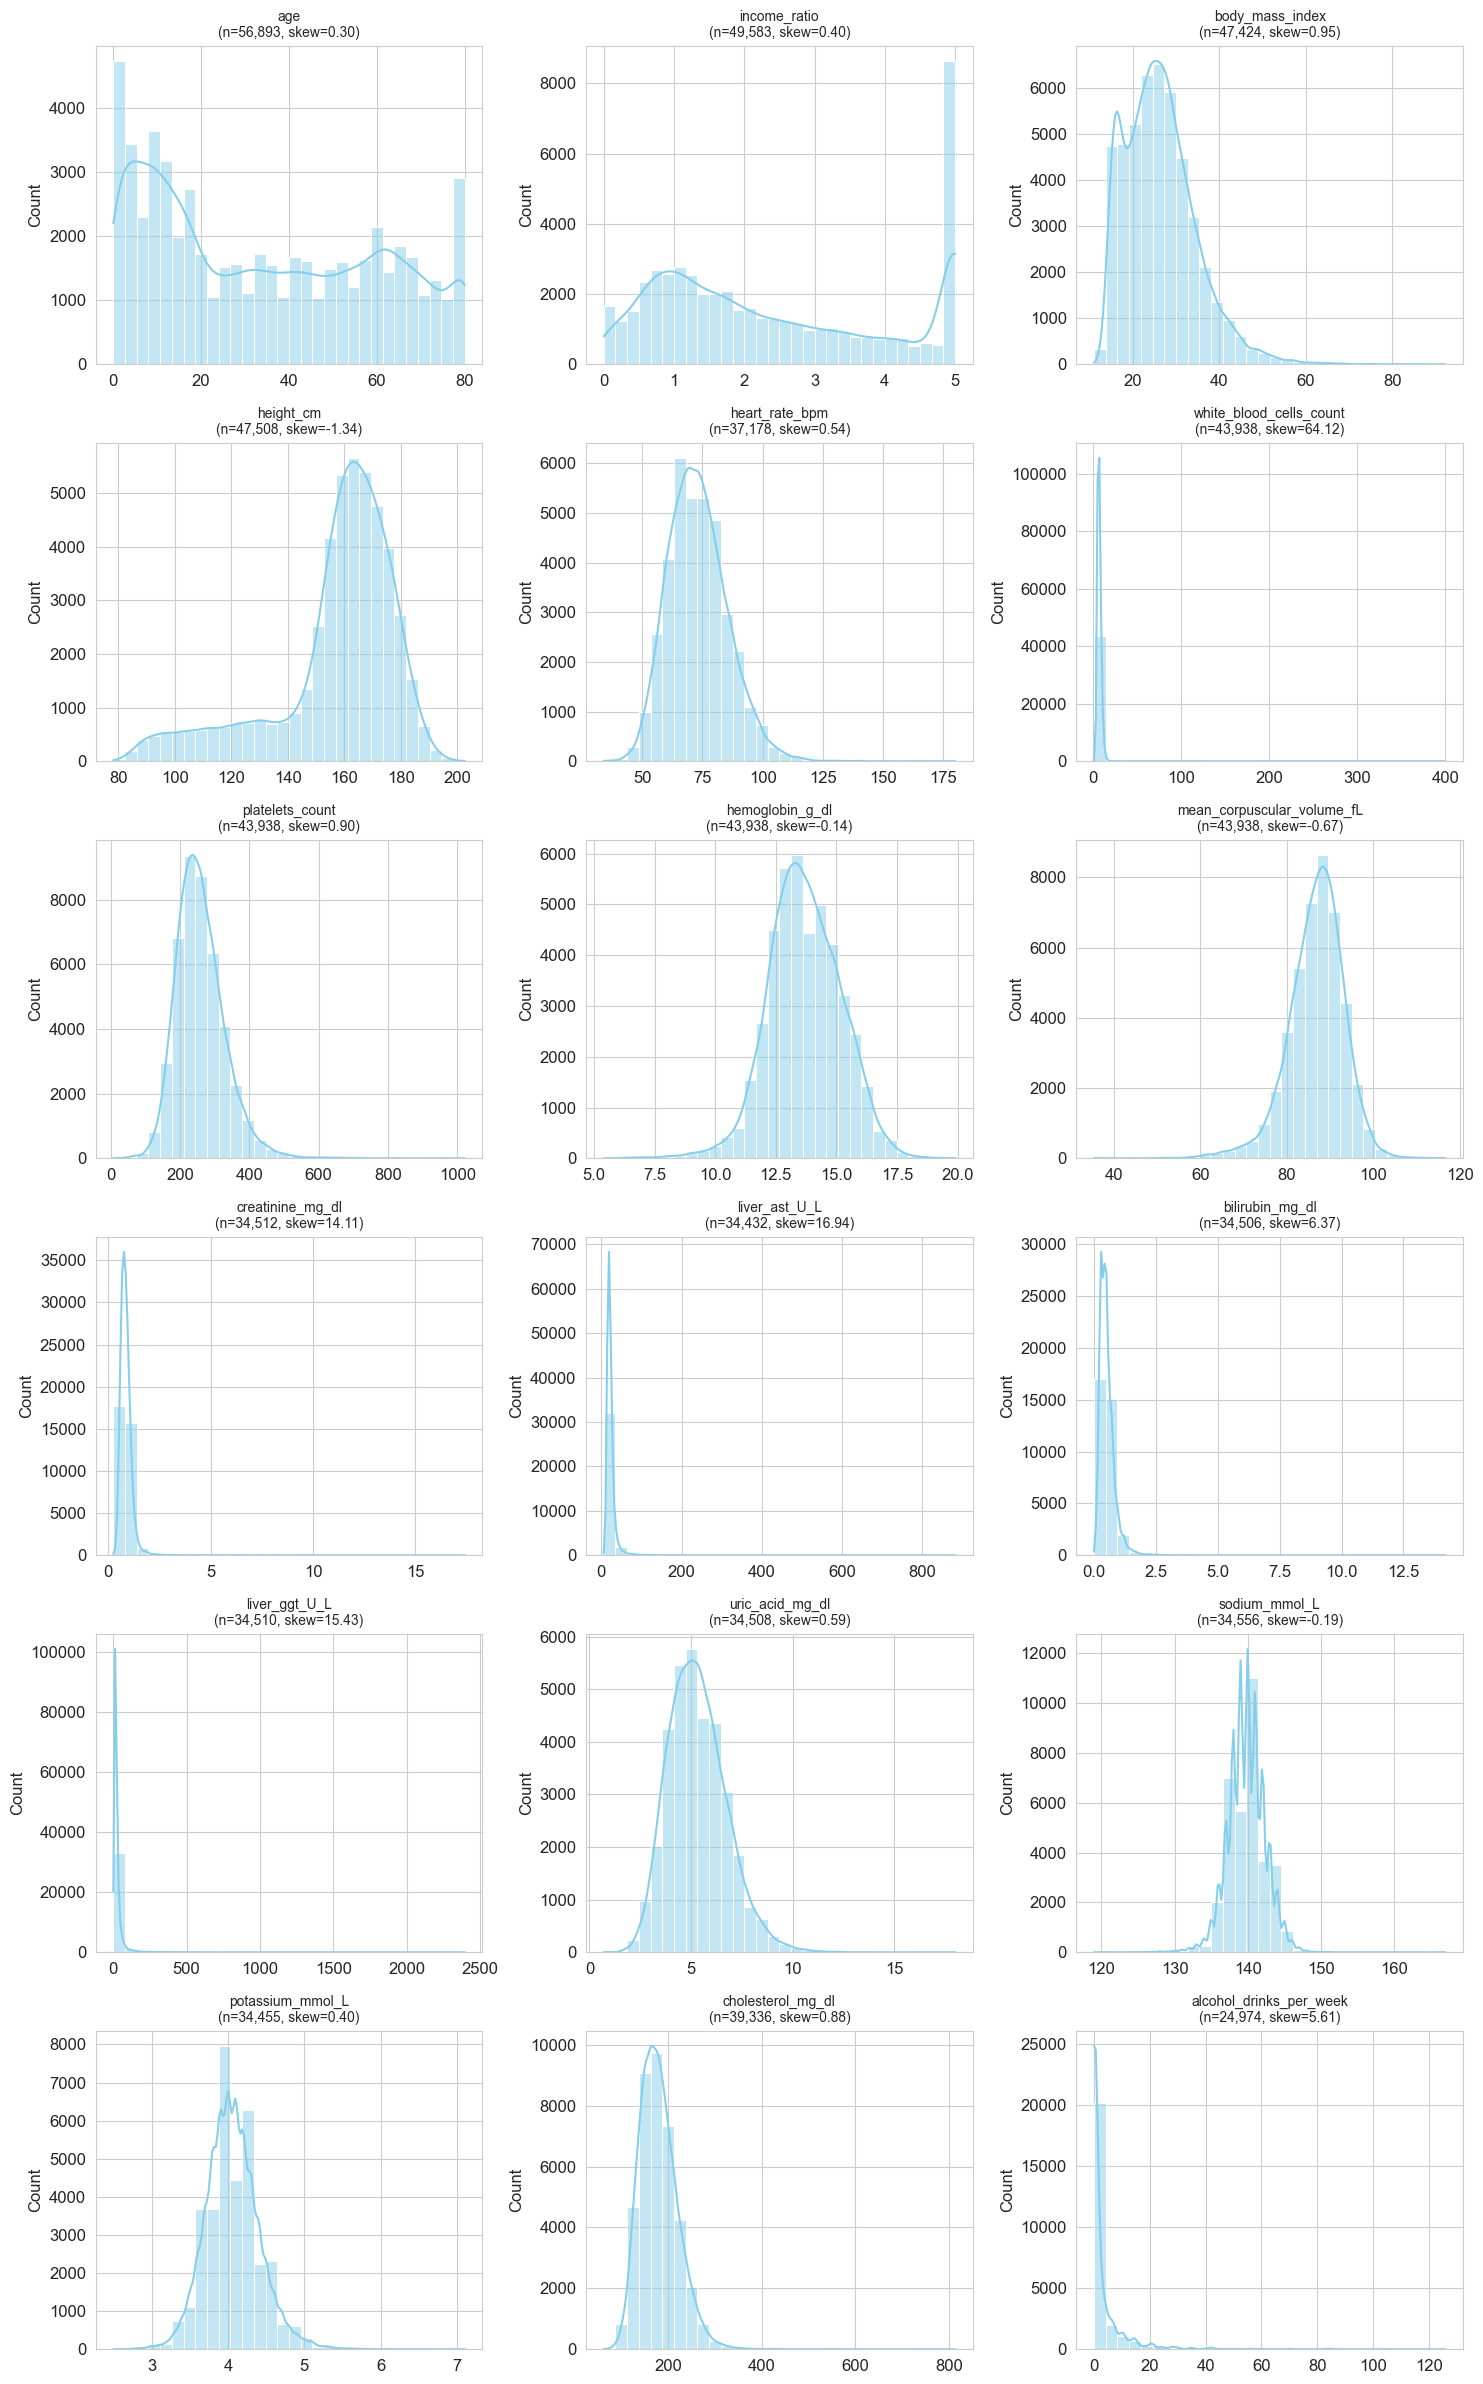

In [26]:
# =========================================================
# 2. NUMERICAL (CONTINUOUS) FEATURES ANALYSIS
# =========================================================

print("="*80)
print("2. NUMERICAL FEATURES: Descriptive Statistics")
print("="*80)

if len(numerical_cols) > 0:
    # Show summary statistics for all numerical features
    print(f"\nAnalyzing {len(numerical_cols)} numerical variables:")
    display(df[numerical_cols].describe().T)
    
    # Visualize distributions for ALL numerical features
    n_cols = 3
    n_rows = int(np.ceil(len(numerical_cols) / n_cols))
    
    plt.figure(figsize=(15, n_rows * 4))
    for i, col in enumerate(numerical_cols):
        plt.subplot(n_rows, n_cols, i + 1)
        data_to_plot = df[col].dropna()
        if len(data_to_plot) > 0:
            sns.histplot(data_to_plot, kde=True, color='skyblue', bins=30)
            plt.title(f'{col}\n(n={len(data_to_plot):,}, skew={data_to_plot.skew():.2f})', fontsize=10)
            plt.xlabel('')
    plt.tight_layout()
    plt.show()
else:
    print("No numerical variables found.")


3. CATEGORICAL FEATURES: Distribution Analysis

Analyzing 3 categorical variables:

gender:
  Distribution:
    2.0: 29,145 (51.23%)
    1.0: 27,748 (48.77%)
  Missing: 0 (0.00%)


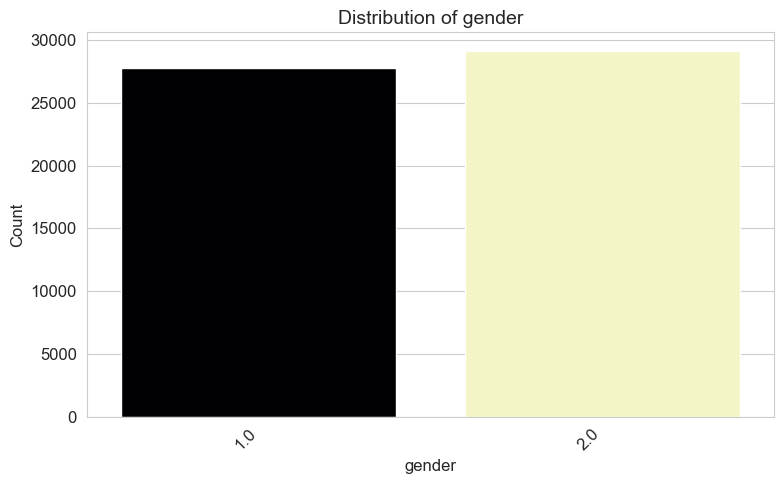


ethnicity:
  Distribution:
    3.0: 21,378 (37.58%)
    4.0: 12,206 (21.45%)
    1.0: 8,125 (14.28%)
    2.0: 6,005 (10.55%)
    6.0: 5,603 (9.85%)
    7.0: 3,576 (6.29%)
  Missing: 0 (0.00%)


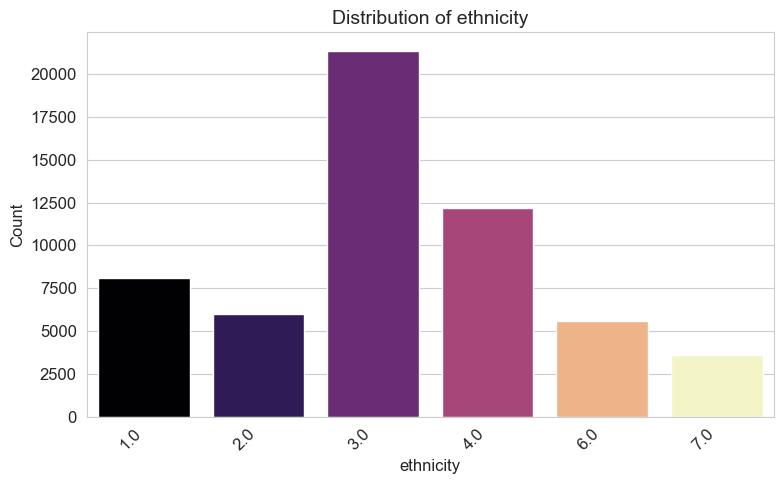


smoking_status:
  Distribution:
    nan: 42,401 (74.53%)
    3.0: 8,265 (14.53%)
    1.0: 4,887 (8.59%)
    2.0: 1,340 (2.36%)
  Missing: 42,401 (74.53%)


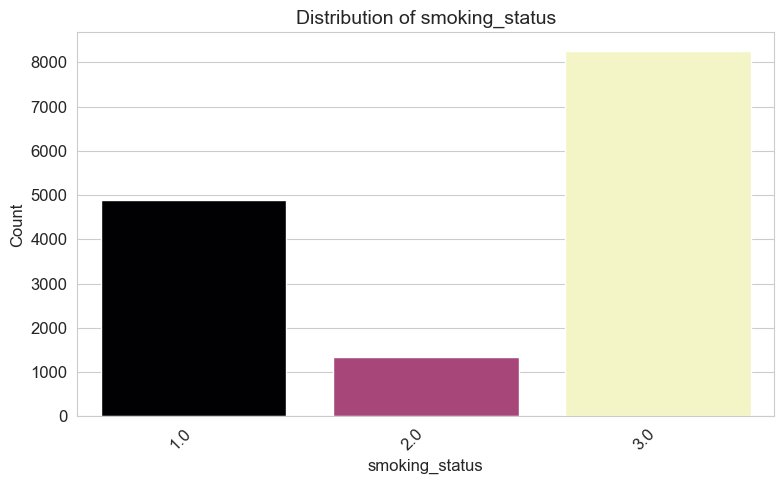

In [27]:
# =========================================================
# 3. CATEGORICAL FEATURES ANALYSIS
# =========================================================

print("="*80)
print("3. CATEGORICAL FEATURES: Distribution Analysis")
print("="*80)

if len(categorical_cols) > 0:
    print(f"\nAnalyzing {len(categorical_cols)} categorical variables:")
    
    for col in categorical_cols:
        print(f"\n{col}:")
        counts = df[col].value_counts(dropna=False)
        pct = df[col].value_counts(normalize=True, dropna=False) * 100
        missing = df[col].isnull().sum()
        
        print(f"  Distribution:")
        for val, count in counts.items():
            print(f"    {val}: {count:,} ({pct[val]:.2f}%)")
        print(f"  Missing: {missing:,} ({missing/len(df)*100:.2f}%)")
        
        # Visualize if not too many categories
        if counts.shape[0] <= 10:
            plt.figure(figsize=(8, 5))
            sns.barplot(x=counts.index, y=counts.values, hue=counts.index, palette='magma', legend=False)
            plt.title(f'Distribution of {col}', fontsize=14)
            plt.ylabel('Count')
            plt.xlabel(col)
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()
        else:
            print(f"  (Skipping visualization - too many categories: {counts.shape[0]})")
else:
    print("No categorical variables found.")
